In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# Checking Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

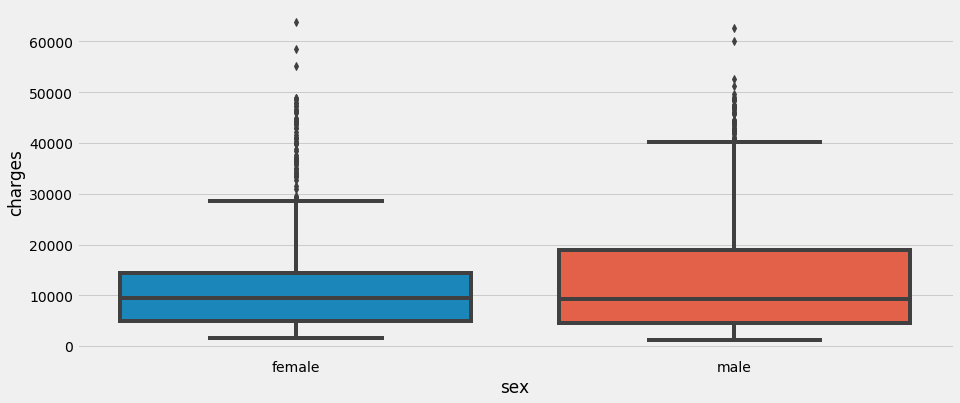

In [7]:
sb.boxplot(x = df['sex'], y = df['charges'], data = df)
plt.show()

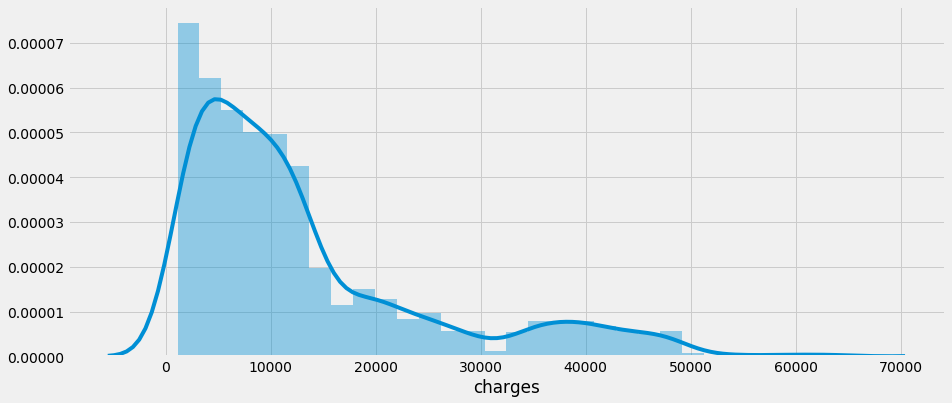

In [8]:
sb.distplot(df['charges']);

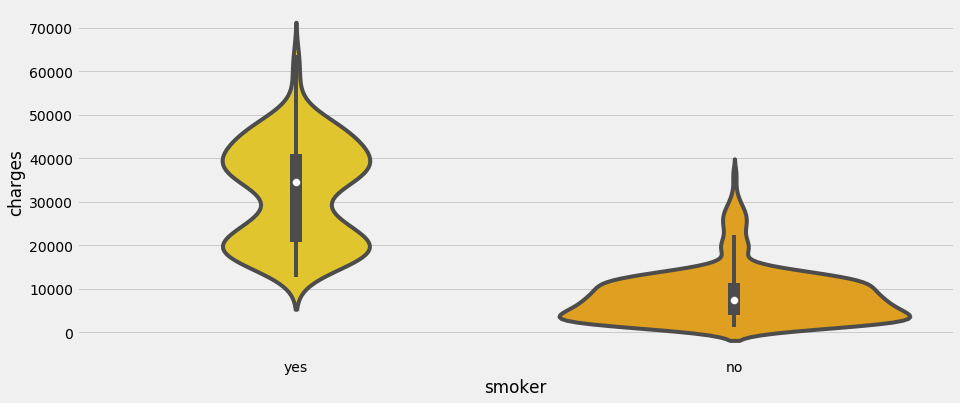

In [9]:
sb.violinplot( x = 'smoker', y = 'charges', data = df, palette = 'Wistia')
plt.show()

In [10]:
df.groupby('region').charges.mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [11]:
df.groupby('region').charges.agg(['mean'])

,mean
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


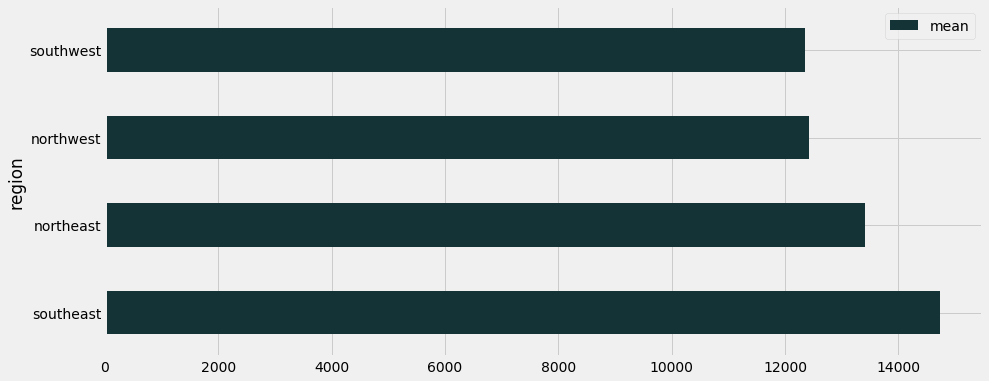

In [12]:
df.groupby('region').charges.agg(['mean']).sort_values(by = 'mean',ascending = False).plot(kind = 'barh', color = '#133337')
plt.show()

# Adding a column/Word to Number column

In [13]:
def map_smoking(column):
    map = []
    
    for row in column:
        if row == 'yes':
            map.append(1)
        else:
            map.append(0)
    return map
df['smoking'] = map_smoking(df['smoker'])

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoking
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


###### Predict Charges

In [15]:
X = df[['age', 'bmi', 'smoking', 'children']]
y = df['charges']

###### spliting 80% data for traning and 20% data for test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
regression.coef_

array([  254.97145832,   320.6190203 , 23587.5571278 ,   430.54569459])

In [19]:
regression.intercept_

-11910.538156786182

In [21]:
regression.score(X, y)

0.7495900810737219

In [22]:
y_pred = regression.predict(X_test)

In [23]:
charges_predict = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})

In [24]:
charges_predict

,Actual,Predicted
578,9724.530000,11461.217784
610,8547.691300,9920.246705
569,45702.022350,37782.650918
1034,12950.071200,15948.078800
198,9644.252500,6880.179534
981,4500.339250,3611.722985
31,2198.189850,1116.037612
1256,11436.738150,14050.366355
1219,7537.163900,8755.914946
1320,5425.023350,7245.244001


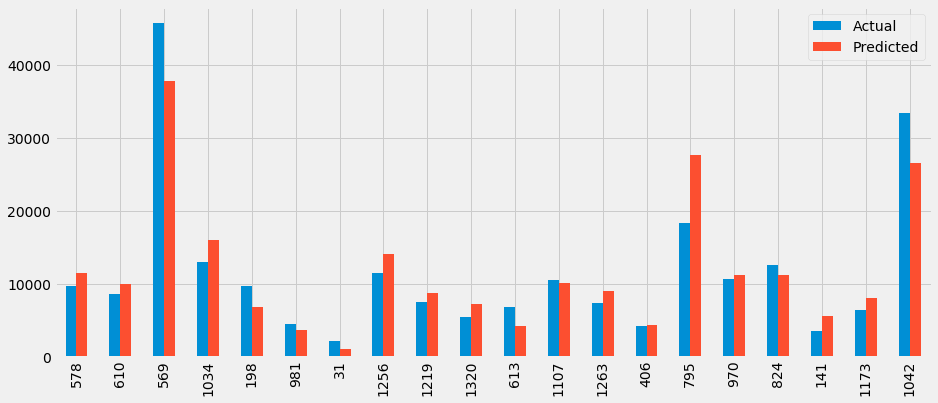

In [25]:
charges_predict.head(20).plot(kind = 'bar')

In [26]:
X_test

,age,bmi,smoking,children
578,52,30.200,0,1
610,47,29.370,0,1
569,48,40.565,1,2
1034,61,38.380,0,0
198,51,18.050,0,0
981,34,21.375,0,0
31,18,26.315,0,0
1256,51,36.385,0,3
1219,38,30.210,0,3
1320,31,31.065,0,3


In [27]:
y_test

578      9724.530000
610      8547.691300
569     45702.022350
1034    12950.071200
198      9644.252500
981      4500.339250
31       2198.189850
1256    11436.738150
1219     7537.163900
1320     5425.023350
613      6753.038000
1107    10493.945800
1263     7337.748000
406      4185.097900
795     18310.742000
970     10702.642400
824     12523.604800
141      3490.549100
1173     6457.843400
1042    33475.817150
966     23967.383050
467     12643.377800
1098    23045.566160
757     23065.420700
1097     1674.632300
319      4667.607650
1286     3732.625100
459      7682.670000
5        3756.621600
517      8413.463050
            ...     
535      6067.126750
853     11729.679500
1014     5383.536000
1186    37465.343750
215      7371.772000
1046     7325.048200
986      8410.046850
489     10461.979400
968      3279.868550
1160     7727.253200
792      2731.912200
1224     6858.479600
465     19521.968200
251     47305.305000
1017     3987.926000
1239     3238.435700
427      7323

In [28]:
y_pred

array([11461.21778356,  9920.2467051 , 37782.65091804, 15948.07879991,
        6880.17953405,  3611.72298504,  1116.03761213, 14050.36635496,
        8755.91494642,  7245.24400051,  4141.88989561, 10105.75686073,
        9070.28895257,  4297.76835129, 27698.89042419, 11158.3034547 ,
       11185.20391622,  5566.17742364,  8020.78118255, 26614.64277528,
       33491.40334294, 14072.29016492, 11247.08992767, 32583.50484706,
        4526.13824173,  8649.40532691,   772.16553719, 10160.3849297 ,
        4246.31063366, 10201.54588088,  8778.51695222, 40341.14720167,
       15888.84361834, 14071.98150805, 24375.43626726,  4693.49482979,
       12917.26831998, 30917.29783745, 33245.25708334,  3865.50438555,
        3634.32499084,  4441.72956167, 30088.45417165, 39174.930838  ,
       28081.31611876,  4782.78344047, 11052.499178  ,  7665.89830648,
        3205.13568791, 10741.82476894,  5132.18752728,  3180.44587201,
       33323.52723342, 37851.13513126, 16314.94956658,  6589.79766046,
      

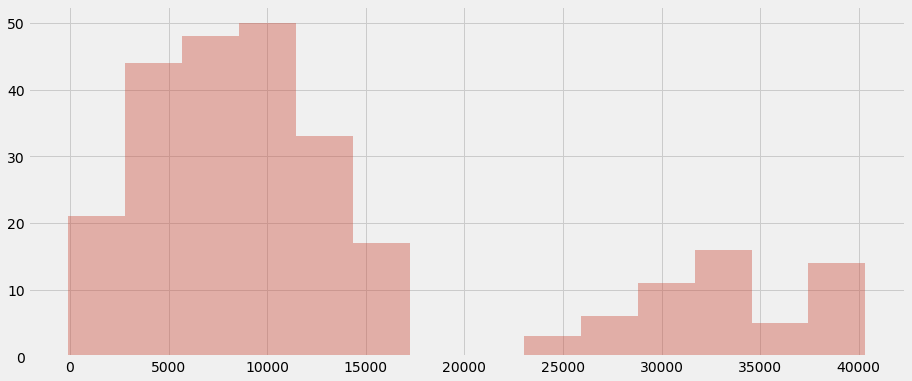

In [32]:
sb.distplot(y_pred, color = '#cb4c3a', kde = False);